## Jack of All Trades, Master of One?
We are trying to create an SVM Classifier that takes a cricketer's statistics, such as batting average and bowling economy, and classify whether the cricketer is a better batsman or bowler. In other words, we will be able to tell which is a cricketer's primary skill - batting or bowling? 

This is pretty fun, since we can use it to determine at which skill those rarebred all-rounders are better at!

**SVMs work well with small datasets and high dimensions**, so they will be perfect for our cause. 
Credit to [Alice Zhao](https://github.com/adashofdata) for providing the inspiration needed for this mini-project.

In [21]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

### The Training Dataset
We shall be giving the SVM labelled data - hence making this a *supervised learning* technique. 
I am taking 15 of the world's top ODI batsmen (in terms of runs scored since 01 Jan 2010), and 15 of the world's top ODI bowlers (in terms of wickets taken since 01 Jan 2010). This data can be retrieved from ESPNCricinfo's Statsguru. We're looking at the players' batting and bowling averages, strike rates, runs scored and economy in this period.

However, some of the top wicket-takers on the list are known to be competent all-rounders, so we need to replace them with other pure bowlers lower down the list. So out go Shakib, Thisara Perera, Sir Jadeja and Woakes - and in come Mitchell Johnson, Shami, Mashrafe Mortaza and Rabada. 

In [22]:
#load the dataset
cricketers = pd.read_csv('cricketer_data.csv')
    
columns = ["Type", "Batting Average", "Batting Strike Rate", "Runs Scored", "Bowling Average", "Bowling Strike Rate", "Economy", "Player"]

cricketers = cricketers.reindex(columns=columns)
cricketers['Runs Scored'] = [10802,7963,7265,6485,6428,6356,6296,6241,6132,5888,5856,5740,5640,5507,5480,437,570,157,348,133,740,154,252,575,94,675,316,259,528,903]

cricketers

,Type,Batting Average,Batting Strike Rate,Runs Scored,Bowling Average,Bowling Strike Rate,Economy,Player
0,Batsman,60.34,93.84,10802,166.25,160.25,6.22,V Kohli (INDIA)
1,Batsman,53.44,90.44,7963,64.38,74.12,5.21,RG Sharma (INDIA)
2,Batsman,49.76,89.11,7265,NaN,NaN,NaN,HM Amla (SA)
3,Batsman,64.20,109.76,6485,28.86,27.43,6.31,AB de Villiers (SA)
4,Batsman,54.01,83.56,6428,NaN,NaN,NaN,LRPL Taylor (NZ)
5,Batsman,52.96,84.70,6356,NaN,NaN,NaN,KC Sangakkara (SL)
6,Batsman,44.65,87.03,6296,45.08,55.47,4.88,TM Dilshan (SL)
7,Batsman,40.52,94.90,6241,NaN,NaN,NaN,EJG Morgan (ENG)
8,Batsman,47.90,81.82,6132,35.41,39.65,5.36,KS Williamson (NZ)
9,Batsman,42.35,88.06,5888,24.50,27.25,5.39,MJ Guptill (NZ)


### Visualization

Now we take two parameters at a time and plot them to see if they can be used to separate the batsmen from the bowlers. 
Not all parameters work - below you will see that many bowlers have batting strikes even better than the world's best batsmen. Plotting batting v/s bowling average or runs scored v/s bowling economy seems to work much better, as it creates separate clusters of batters and bowlers.  

It is also funny to note that while Kohli stands out as the greatest ODI batsman of the decade, it is his bowling strike rate that actually puts him miles above the rest.

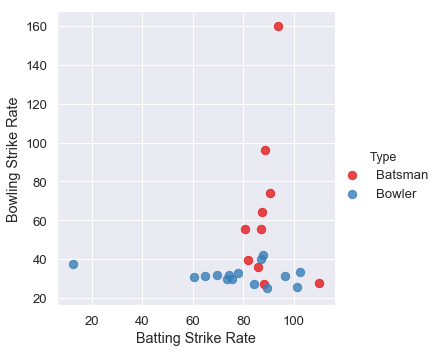

In [23]:
# Plot two parameters
sns.lmplot('Batting Strike Rate', 'Bowling Strike Rate', data=cricketers, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

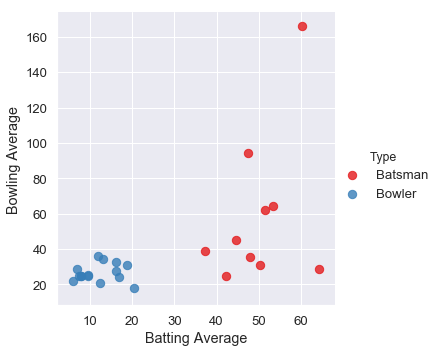

In [24]:
# Plot two parameters
sns.lmplot('Batting Average', 'Bowling Average', data=cricketers, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

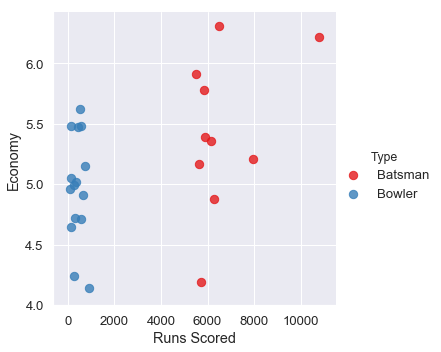

In [25]:
# Plot two parameters
sns.lmplot('Runs Scored', 'Economy', data=cricketers, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

### Creating the Classifier
Let us create our classifier that, for now, shall use two parameters -  batting and bowling averages.

We give the SVM model all the inputs, and fit it to the specified parameters. The model creates a decision boundary known as a **hyperplane** that we plot below. On one side of the hyperplane lie the batsmen, and the on the other the bowlers.

In [26]:
# Specify inputs for the model
cricket = cricketers.dropna() #drop rows having at least one NaN value
parameters = cricket[['Batting Average','Bowling Average']].as_matrix()
type_label = np.where(cricket['Type']=='Batsman', 0, 1)

# Feature names
cricketer_features = cricketers.columns.values[1:].tolist()

C:\Users\Anantk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(parameters, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

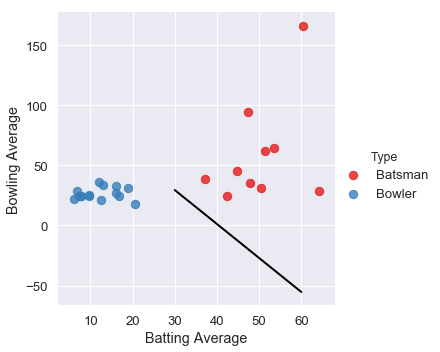

In [29]:
# Plot the hyperplane
sns.lmplot('Batting Average', 'Bowling Average', data=cricketers, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

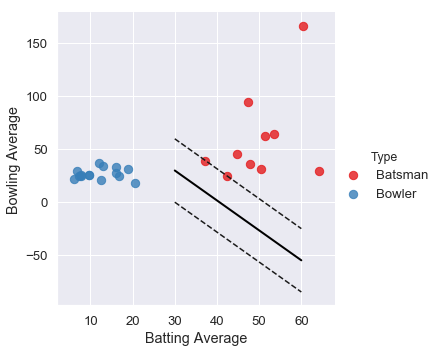

In [30]:
# Look at the margins and support vectors
sns.lmplot('Batting Average', 'Bowling Average', data=cricketers, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

### "Tu batting karta hai ya bowling?"

And that's that! Now we can write a small function that takes the batting and bowling averages of a player, call upon the classifier and display the skill they are better at. 

In [31]:
# function that outputs which skill the player is better at
def batsman_or_bowler(batting_avg, bowling_avg):
    if(model.predict([[batting_avg, bowling_avg]]))==0:
        print('He\'s a better batsman!')
    else:
        print('He\'s a better bowler!')

Let's have some fun.

Plugging in the stats, we see that Shane Watson is a better batsman. No surprises there. 

But both Sir Jadeja and Shakib are also better batters than bowlers! That is surprising, since both featured in the list of top ten wicket-takers since 2010, and we had to remove them from the dataset as bowlers. Just goes to show how much value these guys bring to the playing XI. 

In [32]:
batsman_or_bowler(40.54, 31.79) #for Shane Watson

He's a better batsman!


In [33]:
batsman_or_bowler(37.86, 30.21) #for Shakib al Hasan

He's a better batsman!


In [34]:
batsman_or_bowler(30.60, 36.90) #for Sir Jadeja

He's a better batsman!


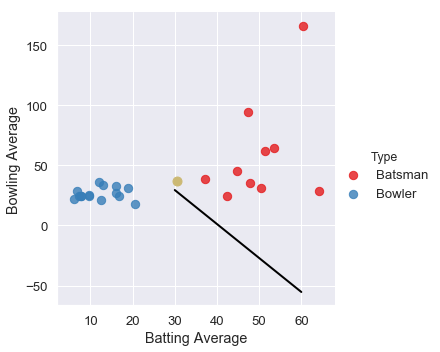

In [35]:
# Plot the point to see where the point lies
sns.lmplot('Batting Average', 'Bowling Average', data=cricketers, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(30.60, 36.90, 'yo', markersize='9');

Jaddu is *just* towards the right of that hyperplane, and that's why he's a slightly better bat. 

In [36]:
batsman_or_bowler(29.90, 40.64) #for Hardik Pandya

He's a better batsman!


In [37]:
batsman_or_bowler(26.02, 34.56) #for Jason Holder

He's a better bowler!


In [38]:
batsman_or_bowler(41.97, 33.97) #for Angelo Mathews

He's a better batsman!


In [39]:
batsman_or_bowler(24.70, 30.47) #for Chris Woakes

He's a better bowler!


In [40]:
batsman_or_bowler(28.46, 31.54) #for Mohammad Nabi

He's a better bowler!
